In [29]:
suppressPackageStartupMessages({
    library("dplyr")
    library("Matrix")
    library("Seurat")
    library("SeuratWrappers")
    library("tictoc")
    library("ggplot2")
    library("ggpubr")
    library("future")
    library("DoubletFinder")
})

devtools::source_url("https://raw.githubusercontent.com/chansigit/scSnippet/master/doublet.removal.R")

In [2]:
path<-"/stor/chensijie/ILC_quants/20200210/soup_adjusted/ABMaLP2_soup"
proj.name <-"ABMaLP2"

In [17]:
tic()
CreateSeuratObject(counts= Read10X(data.dir= path), project = proj.name, min.cells = 0, min.features = 0) %>%
#RenameCells(add.cell.id = proj.name) %>%
PercentageFeatureSet(pattern = "^mt-", col.name = "percent.mt") -> seu
toc()


options(warn=-1)
tic()
seu  <- NormalizeData(seu,  normalization.method="LogNormalize", scale.factor=10000, block.size=800)
seu  <- FindVariableFeatures(seu,  selection.method = "vst", nfeatures = 2000)
plan("sequential")
seu <- ScaleData(seu,  features=rownames(seu), block.size = 1000, min.cells.to.block = 1000)
plan("sequential")
toc()

tic()
seu <- RunPCA(seu, npcs=30, verbose = FALSE)
seu <- RunUMAP(seu, dims = 1:30, umap.method = "umap-learn", metric = "correlation", verbose = FALSE)
toc()

tic()
seu <- FindNeighbors(object = seu, dims = 1:30,verbose=FALSE)
seu <- FindClusters( object = seu, resolution = c(0.1,0.2,0.3,0.4,0.5),verbose=FALSE)
toc()

10.562 sec elapsed


Centering and scaling data matrix



15.466 sec elapsed
26.859 sec elapsed
3.991 sec elapsed


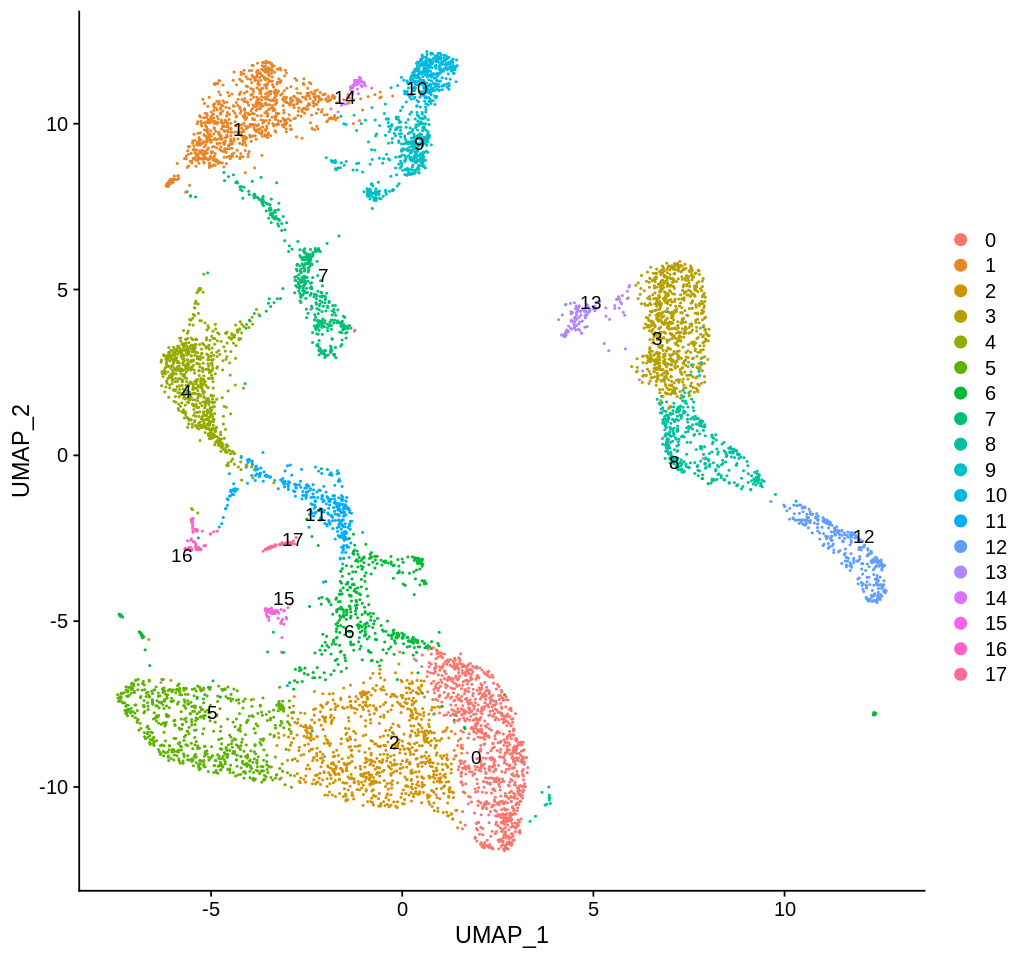

In [18]:
options(repr.plot.width=8.5, repr.plot.height=8)
UMAPPlot(seu, group.by="RNA_snn_res.0.5", label=T,repel=T)

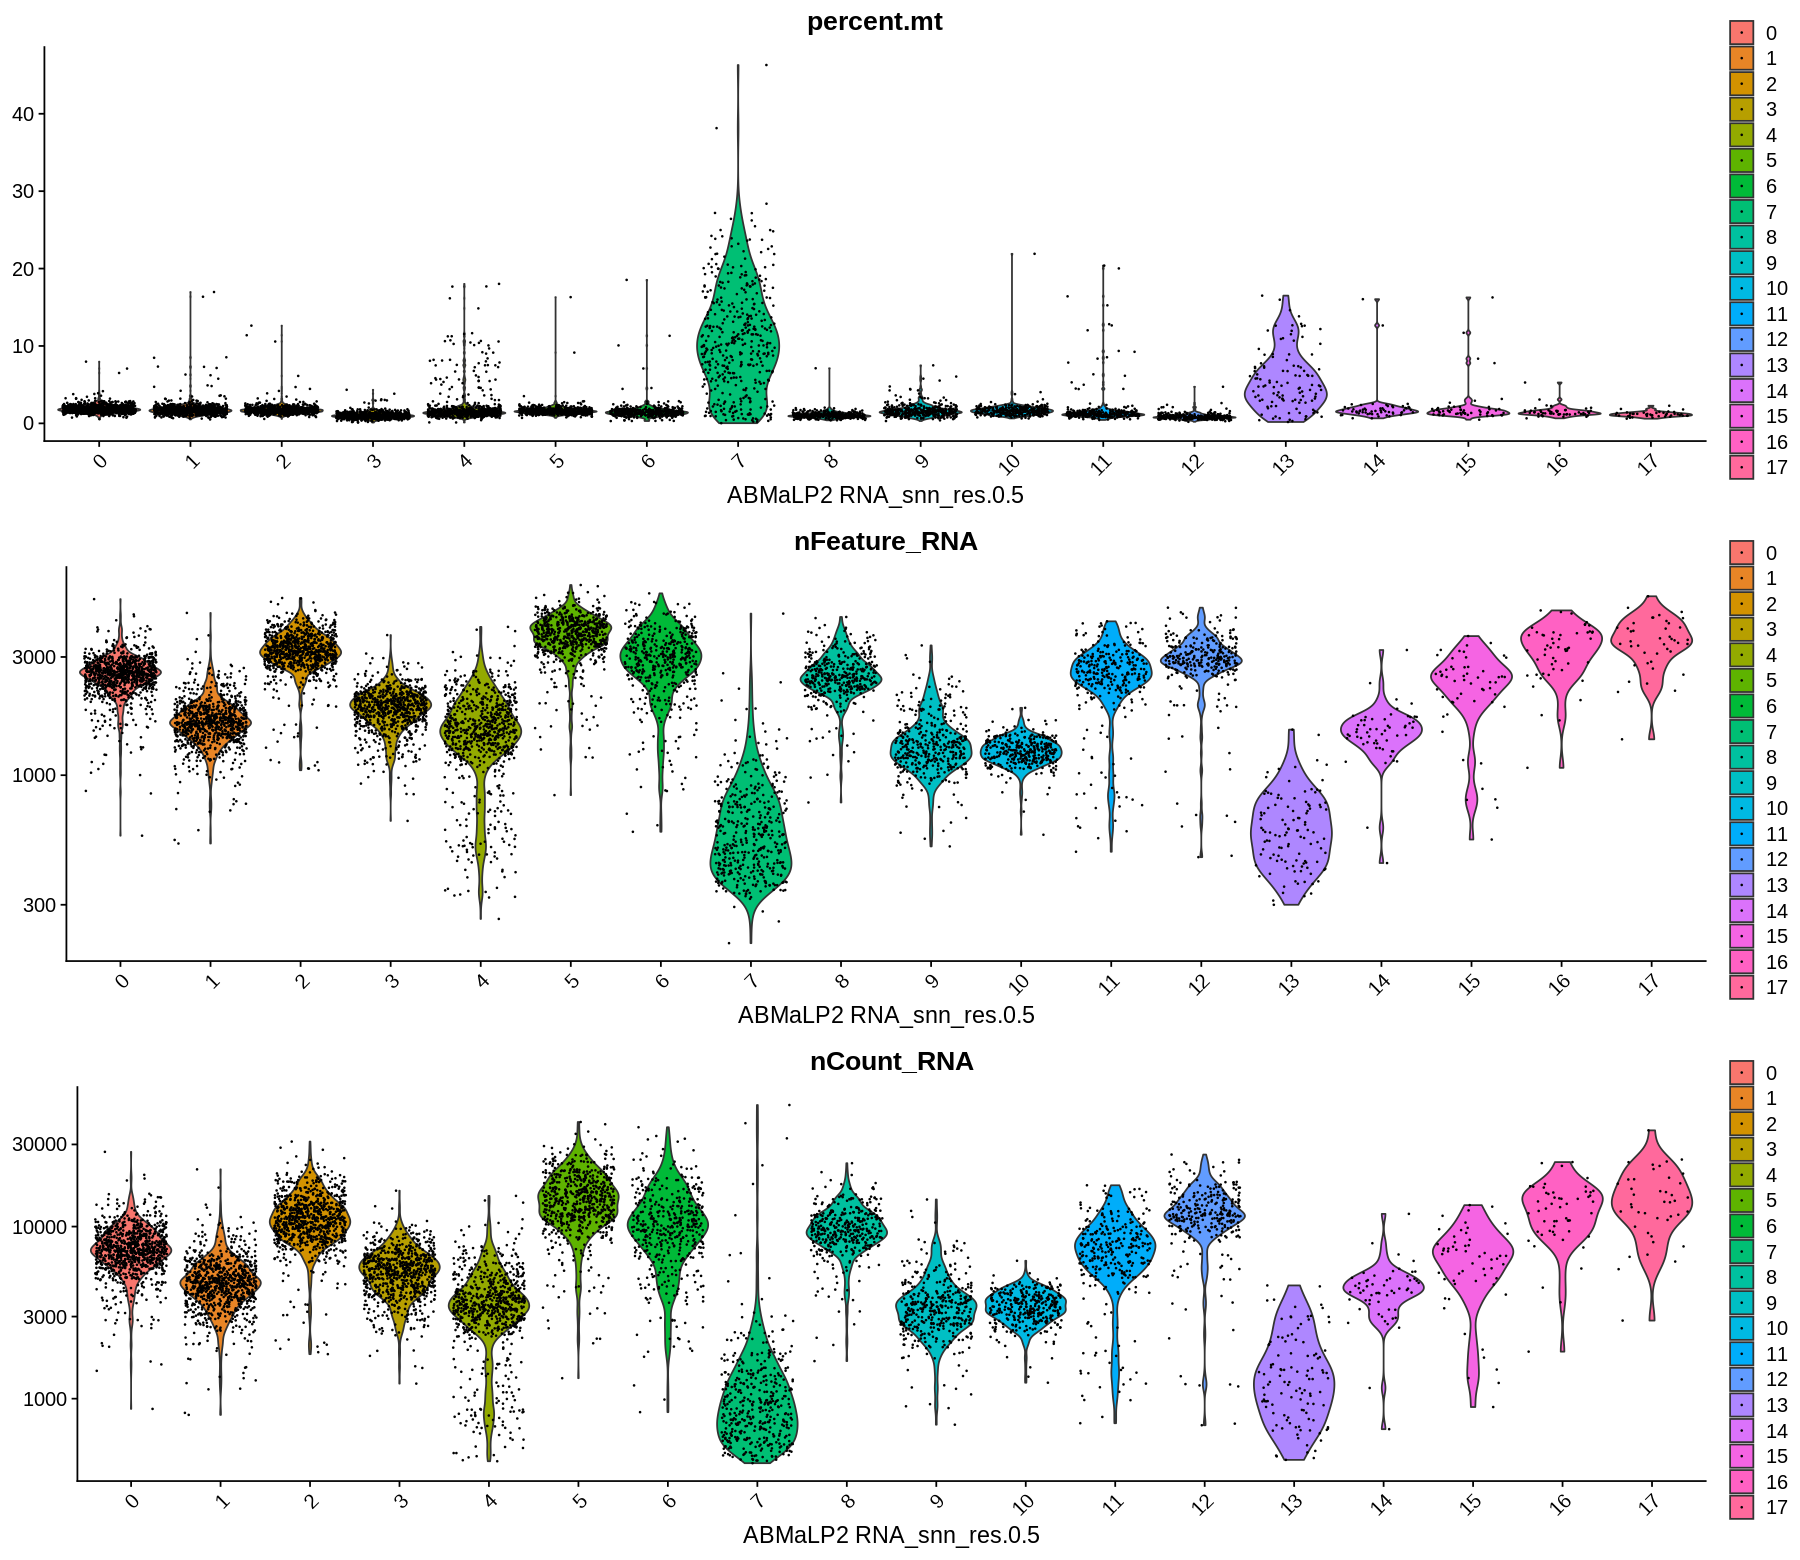

In [19]:
options(repr.plot.width=15, repr.plot.height=13)
Idents(seu)<-"RNA_snn_res.0.5"
group.by<-'RNA_snn_res.0.5'
ggarrange(ncol=1, nrow=3,
VlnPlot(seu, features = "percent.mt", pt.size=0.1, log=F, group.by=group.by)+xlab(paste(proj.name,group.by)),
VlnPlot(seu, features = "nFeature_RNA", pt.size=0.1, log=T, group.by=group.by)+xlab(paste(proj.name,group.by)),
VlnPlot(seu, features = "nCount_RNA", pt.size=0.1, y.max=10000,log=T, group.by=group.by)+xlab(paste(proj.name,group.by))
)

## Drop clusters with high mt-gene percentages 

In [ ]:
seu<-subset(seu, subset=RNA_snn_res.0.5!=7 & RNA_snn_res.0.5!=13)

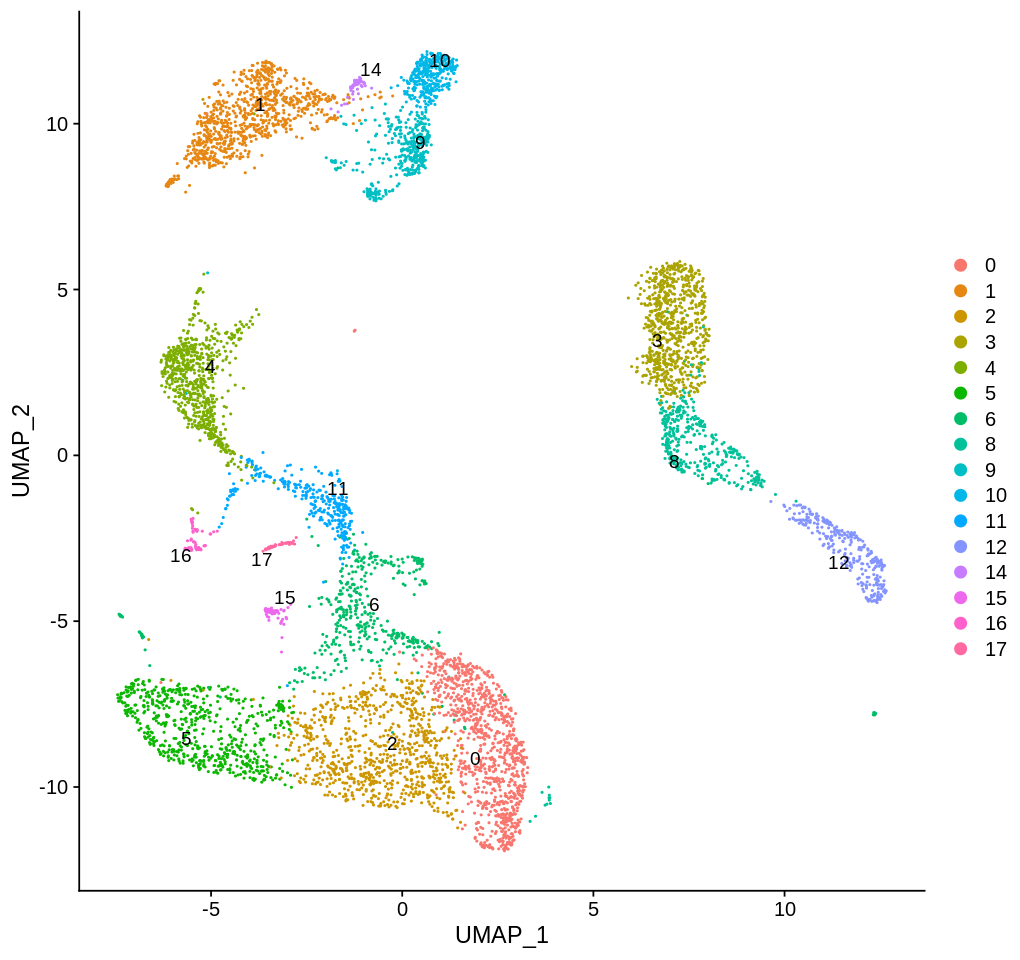

In [20]:
options(repr.plot.width=8.5, repr.plot.height=8)
UMAPPlot(seu, group.by="RNA_snn_res.0.5", label=T,repel=T)

In [21]:
options(warn=-1)
tic()
seu  <- NormalizeData(seu,  normalization.method="LogNormalize", scale.factor=10000, block.size=800)
seu  <- FindVariableFeatures(seu,  selection.method = "vst", nfeatures = 2000)
plan("sequential")
seu <- ScaleData(seu,  features=rownames(seu), block.size = 1000, min.cells.to.block = 1000)
plan("sequential")
toc()

tic()
seu <- RunPCA(seu, npcs=30, verbose = FALSE)
seu <- RunUMAP(seu, dims = 1:30, umap.method = "umap-learn", metric = "correlation", verbose = FALSE)
toc()

tic()
seu <- FindNeighbors(object = seu, dims = 1:30,verbose=FALSE)
seu <- FindClusters( object = seu, resolution = c(0.1,0.2,0.3,0.4,0.5),verbose=FALSE)
toc()

Centering and scaling data matrix



15.16 sec elapsed
25.12 sec elapsed
3.597 sec elapsed


## Drop low quality cells

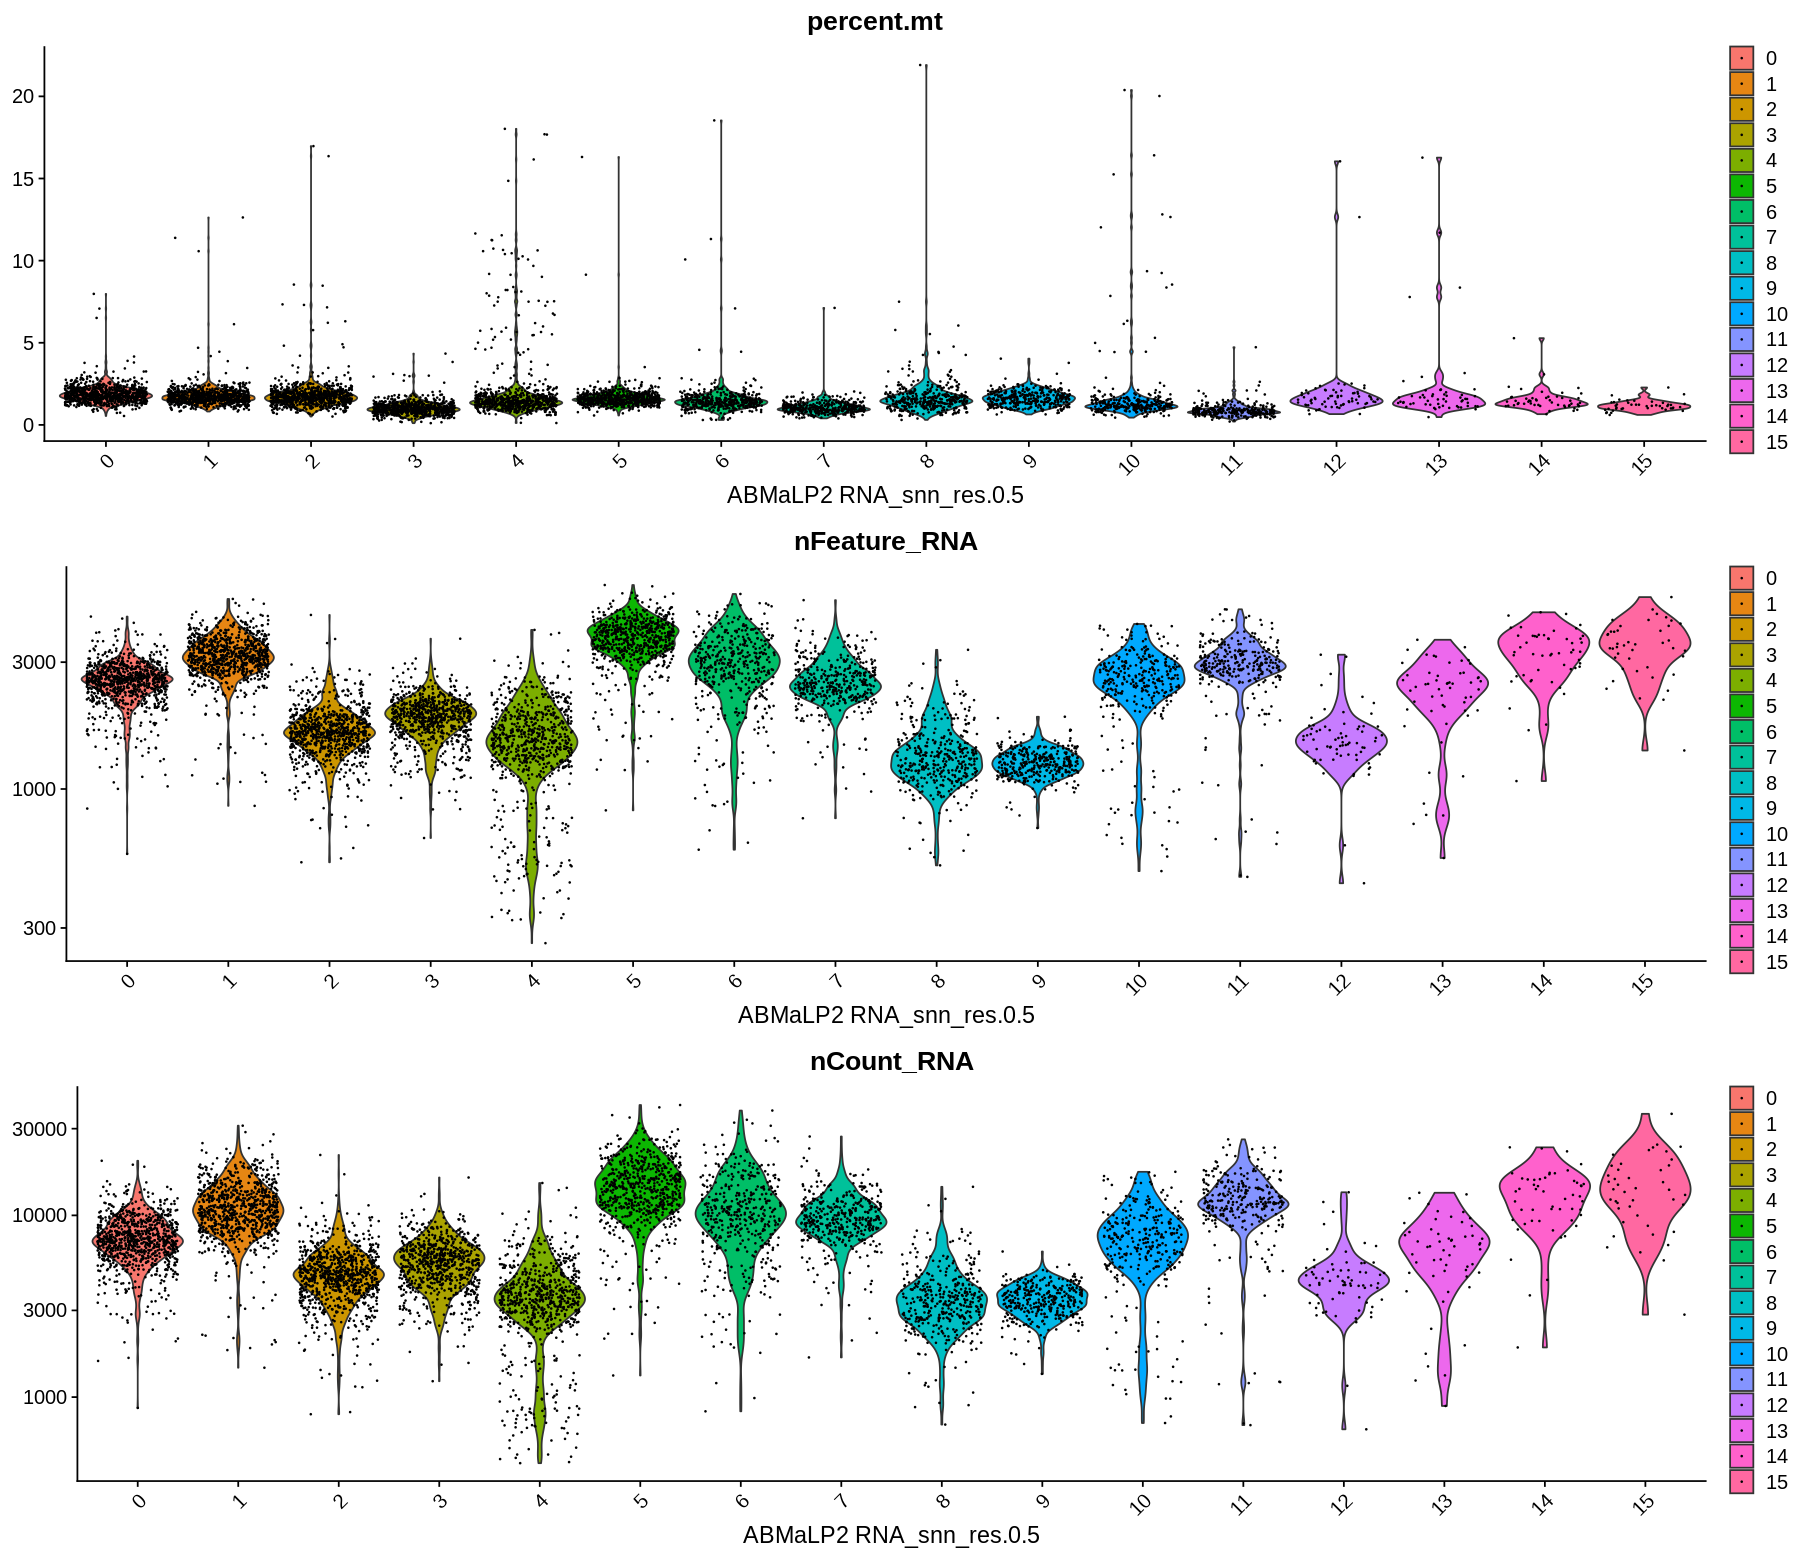

In [22]:
options(repr.plot.width=15, repr.plot.height=13)
Idents(seu)<-"RNA_snn_res.0.5"
group.by<-'RNA_snn_res.0.5'
ggarrange(ncol=1, nrow=3,
VlnPlot(seu, features = "percent.mt", pt.size=0.1, log=F, group.by=group.by)+xlab(paste(proj.name,group.by)),
VlnPlot(seu, features = "nFeature_RNA", pt.size=0.1, log=T, group.by=group.by)+xlab(paste(proj.name,group.by)),
VlnPlot(seu, features = "nCount_RNA", pt.size=0.1, y.max=10000,log=T, group.by=group.by)+xlab(paste(proj.name,group.by))
)

In [23]:
seu<-subset(seu, subset=percent.mt<5 & nFeature_RNA>1000)

In [24]:
options(warn=-1)
tic()
seu  <- NormalizeData(seu,  normalization.method="LogNormalize", scale.factor=10000, block.size=800)
seu  <- FindVariableFeatures(seu,  selection.method = "vst", nfeatures = 2000)
plan("sequential")
seu <- ScaleData(seu,  features=rownames(seu), block.size = 1000, min.cells.to.block = 1000)
plan("sequential")
toc()

tic()
seu <- RunPCA(seu, npcs=30, verbose = FALSE)
seu <- RunUMAP(seu, dims = 1:30, umap.method = "umap-learn", metric = "correlation", verbose = FALSE)
toc()

tic()
seu <- FindNeighbors(object = seu, dims = 1:30,verbose=FALSE)
seu <- FindClusters( object = seu, resolution = c(0.1,0.2,0.3,0.4,0.5),verbose=FALSE)
toc()

Centering and scaling data matrix



15.565 sec elapsed
24.174 sec elapsed
3.636 sec elapsed


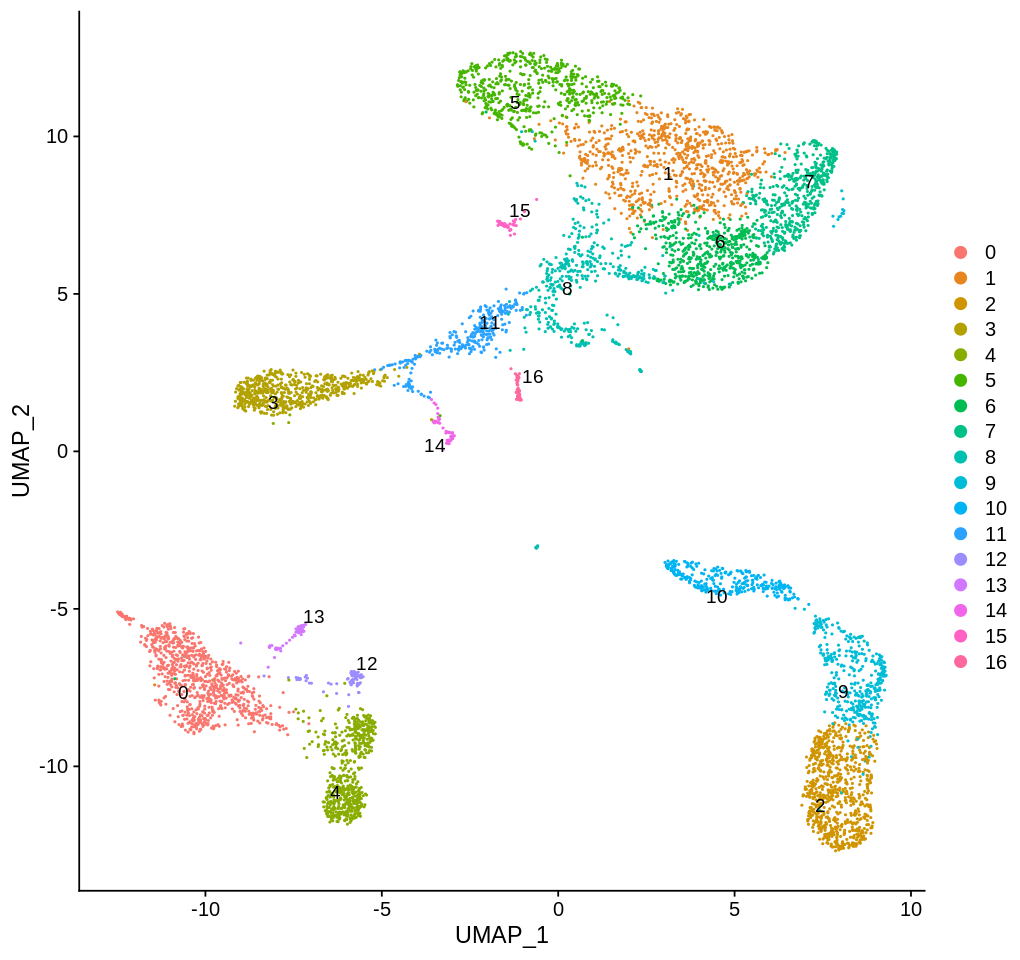

In [25]:
options(repr.plot.width=8.5, repr.plot.height=8)
UMAPPlot(seu, group.by="RNA_snn_res.0.5", label=T,repel=T)

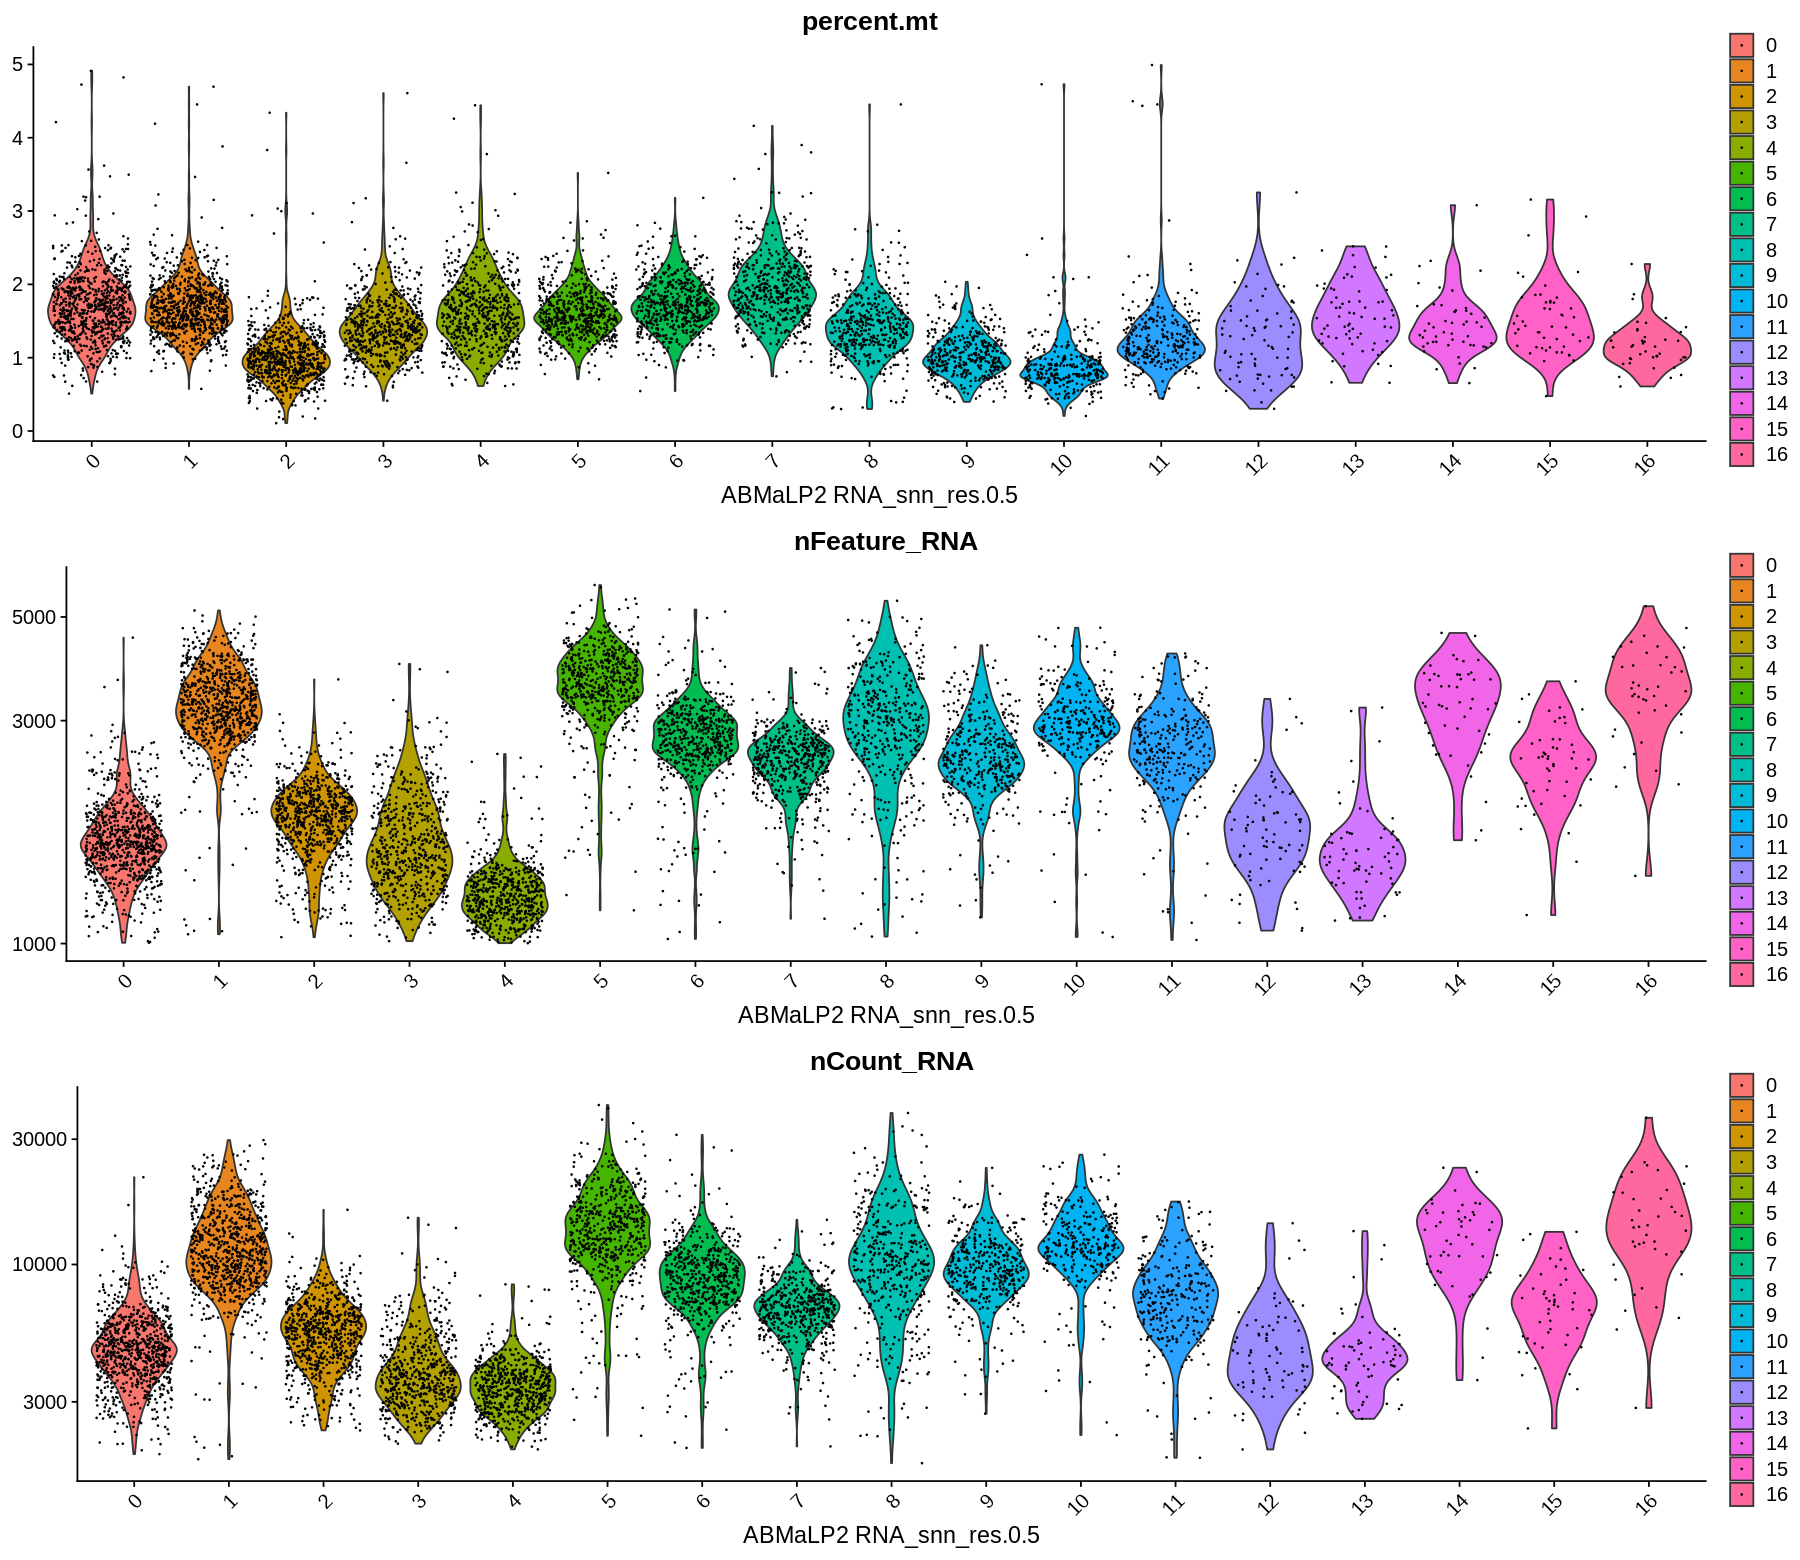

In [28]:
options(repr.plot.width=15, repr.plot.height=13)
Idents(seu)<-"RNA_snn_res.0.5"
group.by<-'RNA_snn_res.0.5'
ggarrange(ncol=1, nrow=3,
VlnPlot(seu, features = "percent.mt", pt.size=0.1, log=F, group.by=group.by)+xlab(paste(proj.name,group.by)),
VlnPlot(seu, features = "nFeature_RNA", pt.size=0.1, log=T, group.by=group.by)+xlab(paste(proj.name,group.by)),
VlnPlot(seu, features = "nCount_RNA", pt.size=0.1, y.max=10000,log=T, group.by=group.by)+xlab(paste(proj.name,group.by))
)

## Doublets

In [35]:
tic()
params<-DoubletRemovalParameters(seu, PCs=1:30)
toc()

Loading required package: fields

Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following object is masked from ‘package:Matrix’:

    det


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: maps

See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 

Centering and scaling data matrix

Centering and scaling data matrix

Centering and scaling data matrix

Centering and scaling data matrix

Centering and scaling data matrix

Centering and scaling data matrix

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997

sweep parameters: 343.867 sec elapsed
343.902 sec elapsed


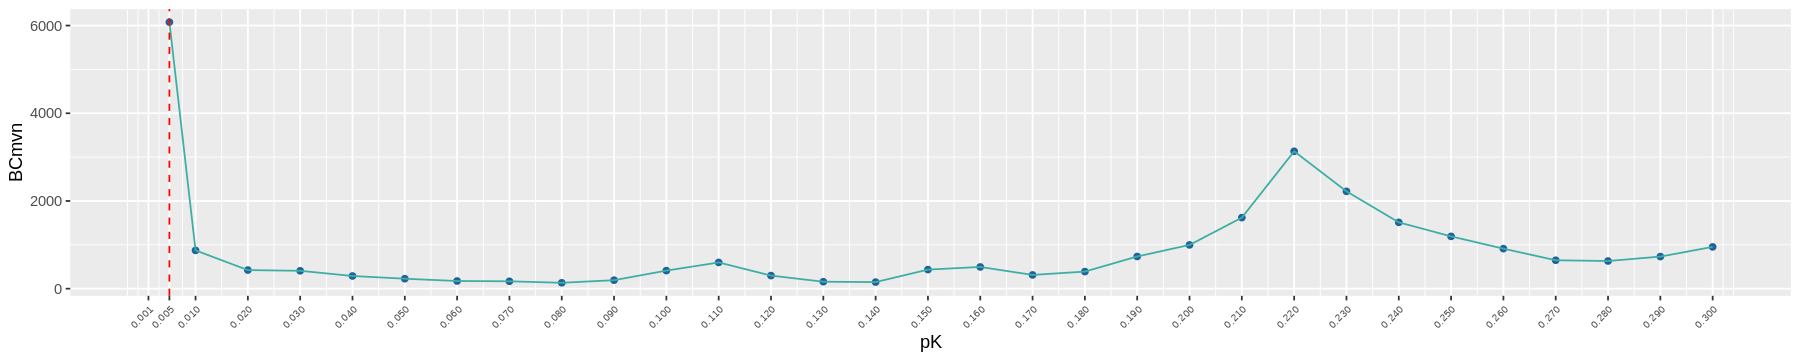

In [37]:
options(repr.plot.wdith=8, repr.plot.height=3)
bcmvnPlot(params$bcmvn, maxpos =0.005)

In [39]:
doublet.rate   <- 0.06
annotations    <- seu@meta.data$RNA_snn_res.0.5
homotypic.prop <- modelHomotypic(annotations) 
nExp_poi       <- round(doublet.rate*length(colnames(x = seu)))  ## Assuming 7.5% doublet formation rate - tailor for your dataset
nExp_poi.adj   <- round(nExp_poi*(1-homotypic.prop))
nExp_poi.adj

[1] 381

In [40]:
pK <- 0.005

tic()
seu.scored     <- doubletFinder_v3(seu, PCs =1:30, pN = 0.25, pK = pK, nExp = nExp_poi.adj, reuse.pANN = FALSE, sct = FALSE)
toc()

# Run it only once!!! or may cause problem
cname     <- colnames(seu.scored[[]])
DF.name   <- cname[grep('^DF',cname)] 
pANN.name <- cname[grep('^pANN',cname)] 
seu.scored[["doublet"]]<-seu.scored[[DF.name]]
seu.scored[["pANN"]]   <-seu.scored[[pANN.name]]
seu.scored[[DF.name]]  <-NULL
seu.scored[[pANN.name]]<-NULL

[1] "Creating 2313 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."
56.296 sec elapsed


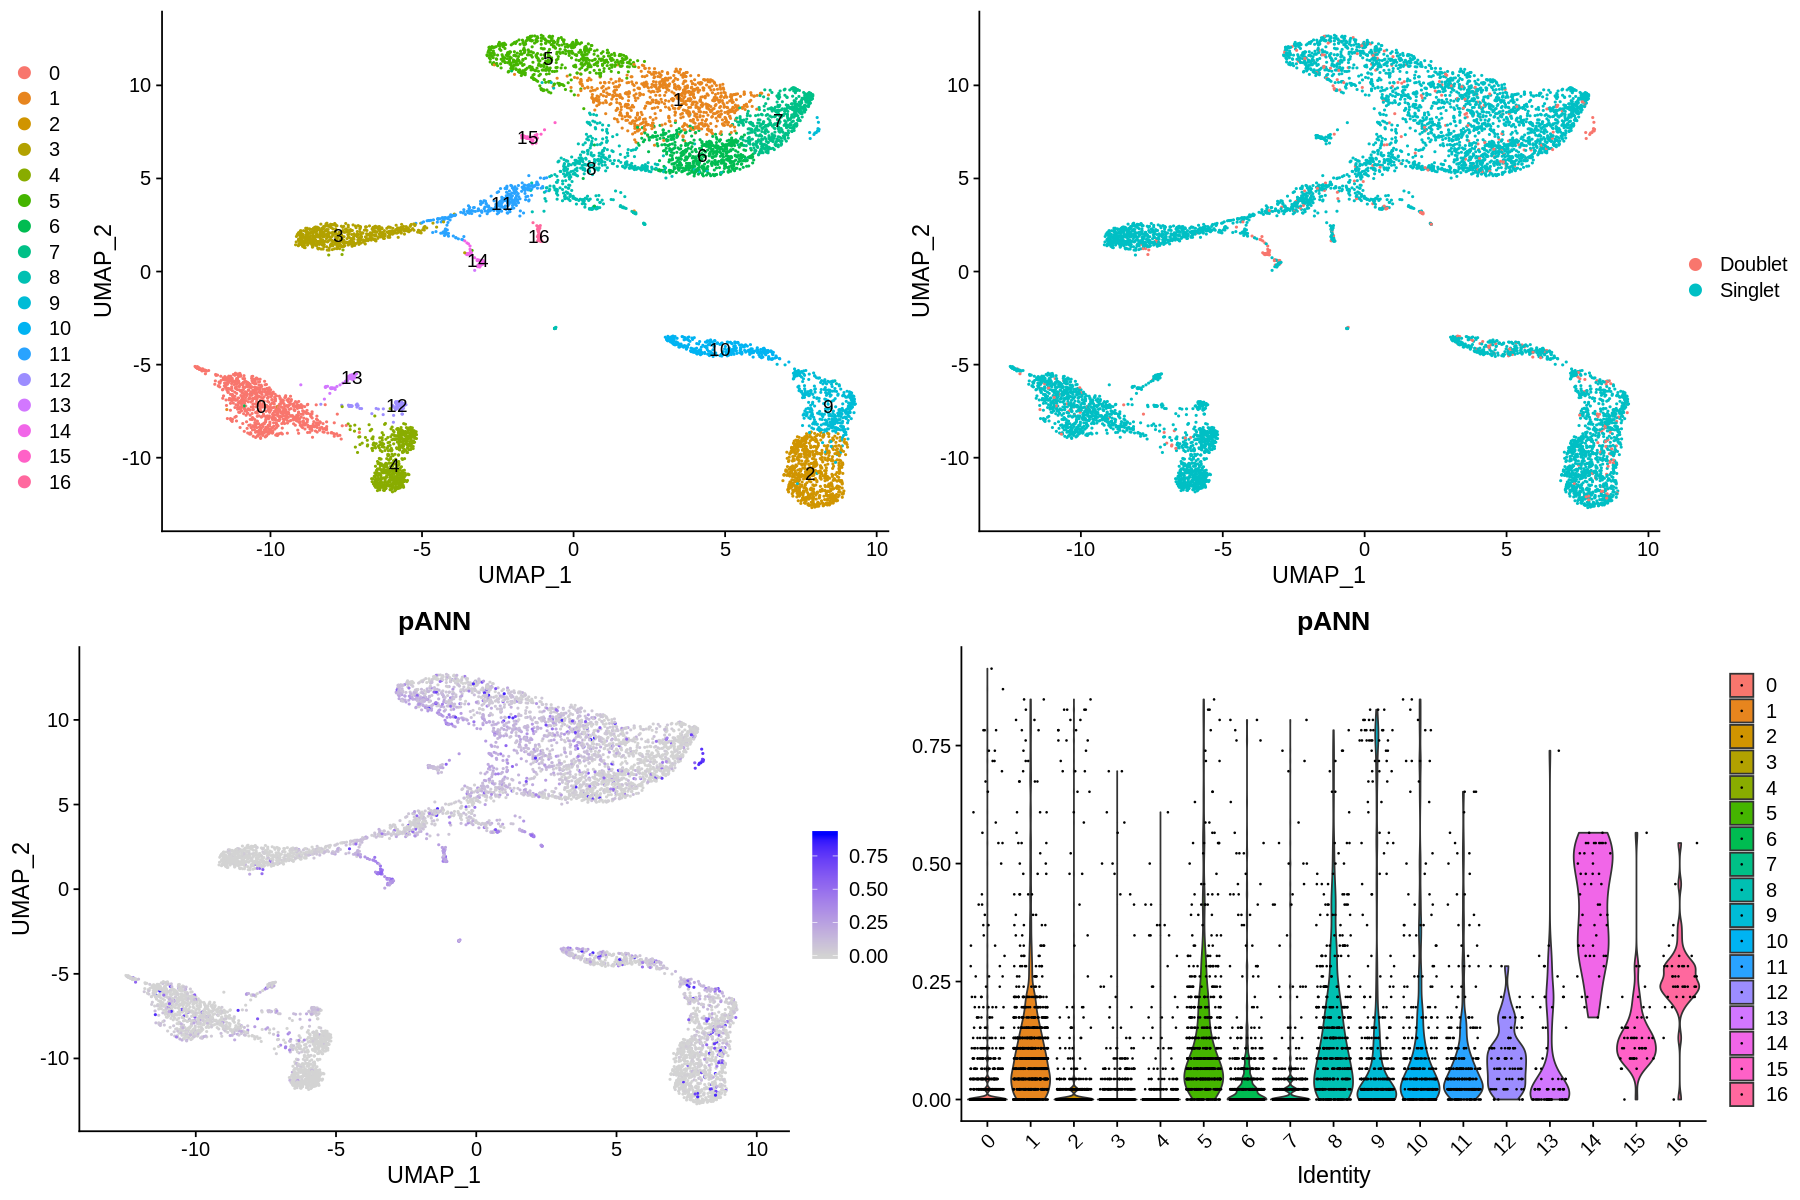

In [41]:
options(repr.plot.width=15,repr.plot.height=10)
p1<-DimPlot(seu.scored, reduction = "umap",label=T)+theme(legend.position="left")
p2<-DimPlot(seu.scored, reduction = "umap",group.by="doublet")+theme(legend.position="right")
p3<-FeaturePlot(seu.scored, features = "pANN")
p4<-VlnPlot(seu.scored, features = "pANN", group.by = "RNA_snn_res.0.5",pt.size=0.1)

library(ggpubr)
ggarrange(p1,p2,p3,p4,nrow=2,ncol=2)

In [44]:
seu.scored->seu

In [45]:
tic()
save(seu, file="./PP1_data/ABMaLP2_PP1.rda", compress=T)
toc()

77.078 sec elapsed
